# Classifying data using Support Vector Machines

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.svm import LinearSVC 
from sklearn.multiclass import OneVsOneClassifier 

create a dataset:

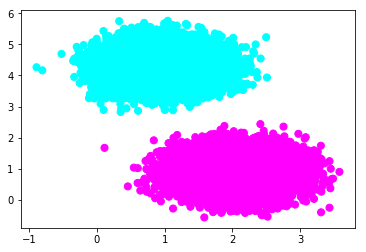

X:
 [[1.88353704 0.37426203]
 [1.94221535 0.43187124]
 [1.72218373 1.30386485]
 [1.72319435 0.75740906]
 [1.18980516 4.28520374]]
Y:
 [1 1 1 1 0]


In [2]:
# importing scikit learn with make_blobs 
from sklearn.datasets.samples_generator import make_blobs 
  
# creating datasets X containing n_samples 
# Y containing two classes 
X, Y = make_blobs(n_samples=30000, centers=2, 
                  random_state=0, cluster_std=0.40) 
  
# plotting scatters  
plt.scatter(X[:, 0], X[:, 1], c = Y, s=50, cmap='cool'); 
plt.show()  

# Print Data
print("X:\n" , X[0:5 , :])
print("Y:\n" , Y[0:5])

Create the SVM classifier with a linear kernel:

In [3]:
# Create SVM classifier 
classifier = OneVsOneClassifier(LinearSVC(random_state=0)) 

Train the classifier:

In [4]:
# Train the classifier 
classifier.fit(X, Y) 

OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=None)

Perform cross validation using an 80/20 split for training and testing, and then predict the output for training data:

In [5]:
# Cross validation 
from sklearn.model_selection import train_test_split # Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 0 )

classifier = OneVsOneClassifier(LinearSVC(random_state=0)) 
classifier.fit(X_train, y_train) 
y_test_pred = classifier.predict(X_test) 

Compute the F1 score for the classifier:

In [6]:
# Compute the F1 score of the SVM classifier 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
f1 = cross_val_score(classifier, X, Y, scoring='f1_weighted' , cv = 5)
print("F1 score: " + str(round(100*f1.mean(), 2)) + "%") 


F1 score: 100.0%


Now that the classifier is ready, let's see how to take a random input data point and predict the output. Let's define one such data point:

In [7]:
# Predict output for a test datapoint 
newData = [[0.5 , 4]] # This is cleary '0' class

We are now ready to predict the output using the classifier:

In [8]:
# Run classifier on encoded datapoint and print output 
predicted_class = classifier.predict(newData) 
print(predicted_class) 

[0]


# Plot SVM

In [9]:
from mlxtend.plotting import plot_decision_regions

Text(0.5, 1.0, 'SVM Decision Region Boundary')

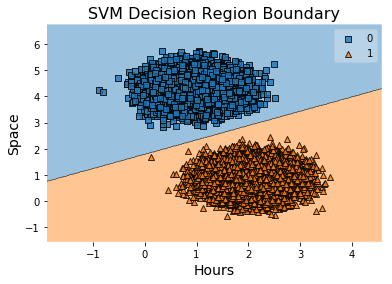

In [10]:
# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X = X, 
                      y = Y,
                      clf = classifier, 
                      legend = 1)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel("Hours", size=14)
plt.ylabel("Space", size=14)
plt.title('SVM Decision Region Boundary', size=16)